# Sex by name using decision trees and random forest


In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Constants
max_length_name = 20

# function to convert a string to a list of ascii values
def transform_string(string):
   string = string.lower()
   ascii_list = [ord(c) for c in string]
   list_ = ascii_list + [0] * (max_length_name - len(ascii_list))
   return np.array(list_).astype(np.float32)

In [3]:
#load data
names = pd.read_csv('unificado-clean.csv')

#explore data
print(names.head())
print(names.info())

      name  sex
0    aaden    1
1  aaliyah    0
2    aamir    1
3    aarav    1
4    aaron    0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11741 entries, 0 to 11740
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    11740 non-null  object
 1   sex     11741 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 183.6+ KB
None


In [4]:
# create X and y
X = np.asarray(names['name'].values.tolist())
y = np.asarray(names['sex'].values.tolist())

X = np.array([transform_string(val) for val in X])

In [5]:
def predict(name, model_loaded):
    data = np.array([transform_string(val) for val in name])
    result = model_loaded.predict(data)
    return ['m' if logit > 0.5 else 'f' for logit in result]

In [6]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

def show_confusion_matrix(model, X, y):
    prediction = model.predict(X)
    confusion_matrix = metrics.confusion_matrix(y, prediction)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['M', 'F'])

    cm_display.plot()
    plt.show()

### Decision Trees

In [7]:
tree_model = DecisionTreeClassifier(max_depth=15)
history = tree_model.fit(X, y)

In [8]:
tree_model_pred = tree_model.predict(X)
print('Accuracy of Decision Tree Model: ', accuracy_score(y, tree_model_pred))

Accuracy of Decision Tree Model:  0.8754790903670897


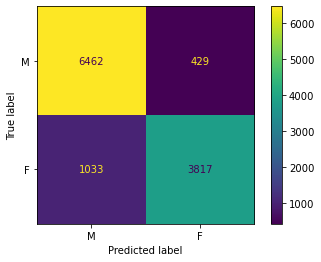

In [9]:
show_confusion_matrix(tree_model, X, y)

### Random Forest

In [10]:
random_model = RandomForestClassifier(n_estimators=1000, max_features=20, max_depth=15)
history = random_model.fit(X, y)

In [11]:
random_model_pred = random_model.predict(X)
print('Accuracy of Random Forest Model: ', accuracy_score(y, random_model_pred))

Accuracy of Random Forest Model:  0.9016267779575845


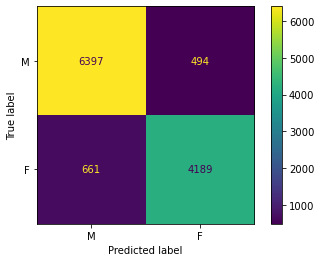

In [12]:
show_confusion_matrix(random_model, X, y)

In [13]:
test_data = ['Roberto', 'Stephen', 'Allan', 'Maria', 'Carla', 'Gilberto']
predictions_trees = predict(test_data, tree_model)
predictions_random = predict(test_data, random_model)
print('Predictions for Decision Tree Model: ', predictions_trees)
print('Predictions for Random Forest Model: ', predictions_random)

Predictions for Decision Tree Model:  ['m', 'm', 'm', 'f', 'f', 'm']
Predictions for Random Forest Model:  ['m', 'm', 'm', 'f', 'f', 'm']


## Optimización de hiperparámetros

In [14]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Árboles de decisión

In [15]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
	tree_model_op = DecisionTreeClassifier()
	# define search space
	space = dict()
	space['max_depth'] = [1, 5, 10, 15, 20, 50]
	space['max_features'] = [2, 4, 6, 8 ,10, 20]
	# define search
	search = GridSearchCV(tree_model_op, space, scoring='accuracy', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train, y_train)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test)
	# evaluate the model
	acc = accuracy_score(y_test, yhat)
	# store the result
	outer_results.append(acc)
	# report progress
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>acc=0.721, est=0.725, cfg={'max_depth': 10, 'max_features': 20}
>acc=0.773, est=0.734, cfg={'max_depth': 10, 'max_features': 20}
>acc=0.756, est=0.721, cfg={'max_depth': 10, 'max_features': 20}
>acc=0.736, est=0.724, cfg={'max_depth': 10, 'max_features': 20}
>acc=0.737, est=0.720, cfg={'max_depth': 10, 'max_features': 20}
>acc=0.747, est=0.735, cfg={'max_depth': 10, 'max_features': 20}
>acc=0.746, est=0.723, cfg={'max_depth': 10, 'max_features': 20}
>acc=0.741, est=0.725, cfg={'max_depth': 10, 'max_features': 20}
>acc=0.739, est=0.728, cfg={'max_depth': 10, 'max_features': 20}
>acc=0.756, est=0.730, cfg={'max_depth': 10, 'max_features': 20}
Accuracy: 0.745 (0.013)


In [16]:
tree_model_op = DecisionTreeClassifier(max_depth=10, max_features=20)
tree_model_op.fit(X, y)
tree_model_pred = tree_model_op.predict(X)
print('Accuracy of Decision Tree Model Optimized: ', accuracy_score(y, tree_model_pred))

Accuracy of Decision Tree Model Optimized:  0.8035942423984328


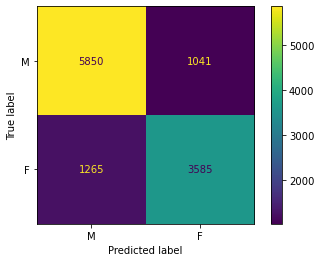

In [17]:
show_confusion_matrix(tree_model_op, X, y)

### Bosques aleatorios

In [18]:
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
	random_model_op = RandomForestClassifier(random_state=1)
	# define search space
	space = dict()
	space['max_depth'] = [1, 10, 15, 20]
	space['n_estimators'] = [10, 50, 150, 250]
	space['max_features'] = [2, 4, 6, 10, 20]
	# define search
	search = GridSearchCV(random_model_op, space, scoring='accuracy', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train, y_train)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test)
	# evaluate the model
	acc = accuracy_score(y_test, yhat)
	# store the result
	outer_results.append(acc)
	# report progress
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>acc=0.753, est=0.758, cfg={'max_depth': 10, 'max_features': 20, 'n_estimators': 250}
>acc=0.790, est=0.755, cfg={'max_depth': 10, 'max_features': 20, 'n_estimators': 250}
>acc=0.767, est=0.755, cfg={'max_depth': 10, 'max_features': 20, 'n_estimators': 150}
>acc=0.742, est=0.762, cfg={'max_depth': 10, 'max_features': 20, 'n_estimators': 250}
>acc=0.759, est=0.756, cfg={'max_depth': 10, 'max_features': 20, 'n_estimators': 250}
>acc=0.764, est=0.756, cfg={'max_depth': 10, 'max_features': 20, 'n_estimators': 250}
>acc=0.764, est=0.754, cfg={'max_depth': 10, 'max_features': 20, 'n_estimators': 150}
>acc=0.774, est=0.753, cfg={'max_depth': 10, 'max_features': 20, 'n_estimators': 150}
>acc=0.747, est=0.759, cfg={'max_depth': 10, 'max_features': 20, 'n_estimators': 250}
>acc=0.782, est=0.757, cfg={'max_depth': 10, 'max_features': 20, 'n_estimators': 150}
Accuracy: 0.764 (0.014)


In [19]:
random_model_op = RandomForestClassifier(n_estimators=100, max_features=10, max_depth=10)
random_model_op.fit(X, y)
random_model_pred = random_model_op.predict(X)
print('Accuracy of Random Forest Model Optimized: ', accuracy_score(y, random_model_pred))

Accuracy of Random Forest Model Optimized:  0.8234392300485478


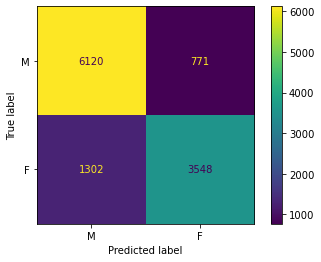

In [20]:
show_confusion_matrix(random_model_op, X, y)